In [54]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from scipy import interp
import itertools
import random

%matplotlib inline

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [4]:
#Data Sourcing:
df = pd.read_csv("../input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_seq_items',None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

In [6]:

''' # Save Model Using Pickle
import pickle 
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(knn) 
  
# Load the pickled model 
knn_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
knn_from_pickle.predict(X_test)
'''

' # Save Model Using Pickle\nimport pickle \n# Save the trained model as a pickle string. \nsaved_model = pickle.dumps(knn) \n  \n# Load the pickled model \nknn_from_pickle = pickle.loads(saved_model) \n  \n# Use the loaded pickled model to make predictions \nknn_from_pickle.predict(X_test)\n'

# New Section

In [7]:
'''from google.colab import drive
drive.mount('/content/drive')
'''

"from google.colab import drive\ndrive.mount('/content/drive')\n"

In [8]:
'''
!pip install -U -q PyDrive 
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive   
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
  
  
# Authenticate and create the PyDrive client. 
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)
#4/3wGXKcY9N0OiP-OIYvx9HDvpuFu7QqnE5t0CQWmfeFB2B748JK6PDPA
'''

'\n!pip install -U -q PyDrive \nfrom pydrive.auth import GoogleAuth \nfrom pydrive.drive import GoogleDrive   \nfrom google.colab import auth \nfrom oauth2client.client import GoogleCredentials \n  \n  \n# Authenticate and create the PyDrive client. \nauth.authenticate_user() \ngauth = GoogleAuth() \ngauth.credentials = GoogleCredentials.get_application_default() \ndrive = GoogleDrive(gauth)\n#4/3wGXKcY9N0OiP-OIYvx9HDvpuFu7QqnE5t0CQWmfeFB2B748JK6PDPA\n'

In [9]:
''' # #link="https://drive.google.com/file/d/1y4A_AiqmO12dfKKx7N7YLBq87mWhq4a5/view?usp=sharing"
link="https://drive.google.com/file/d/1iD-zARy5pR8oqah_AdbScqUvl2omxYTi/view?usp=sharing"
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('creditcard.csv')   
'''  


' # #link="https://drive.google.com/file/d/1y4A_AiqmO12dfKKx7N7YLBq87mWhq4a5/view?usp=sharing"\nlink="https://drive.google.com/file/d/1iD-zARy5pR8oqah_AdbScqUvl2omxYTi/view?usp=sharing"\nid = link.split("/")[-2] \n  \ndownloaded = drive.CreateFile({\'id\':id})  \ndownloaded.GetContentFile(\'creditcard.csv\')   \n'

In [10]:
# #Data Sourcing:
# df = pd.read_csv('creditcard.csv')
# df.head(10)

In [11]:
#observe the different feature types present in the given dataset:
df.shape
#(284807, 31)

(284807, 31)

In [12]:
#Data Describe:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
#Input Data Info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
#Checking the DataFrame have any Null values:
df.isnull().sum(axis=1).any()

False

In [17]:
# Drop duplicate records
df.drop_duplicates()
df.shape

(284807, 31)

Here we will observe the distribution of our Target Feature Class:


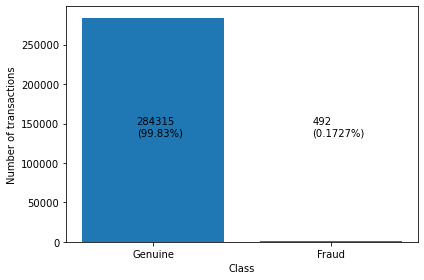

In [18]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations:
plt.bar(['Genuine','Fraud'], df['Class'].value_counts())
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.tight_layout()
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[0], 
                                   df['Class'].value_counts()[0]/df['Class'].count()*100),
             (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(df['Class'].value_counts()[1], 
                                         df['Class'].value_counts()[1]/df['Class'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')
plt.show()

<font color=blue size=5> Inference: </font>

-   Data has **31 features, 2.85 Lakh data points.**
-   Out of 31 only **Class is int data type rest are Float types.**
-   Data points have **No null values.**
-   Data classification as below, which is **Highly Imbalanced**:
    - Non-Fraud (99.83%)
    - Fraud transactions (0.17%)

In [19]:
#DF uniqueness Check:
print('Total Unique Count:')
df['Class'].nunique()
print('Total Unique values:')
df['Class'].unique()

Total Unique Count:
Total Unique values:


array([0, 1])

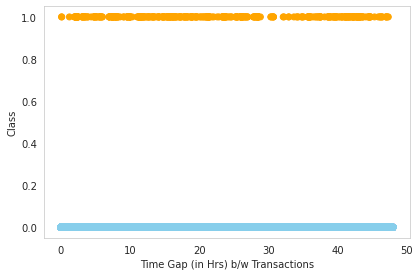

In [20]:
# Create a scatter plot to observe the distribution of classes with time
sns.set_style("whitegrid", {'axes.grid' : False})
plt.ylabel('Class')
plt.xlabel('Time Gap (in Hrs) b/w Transactions')
plt.tight_layout()
color= ['skyblue' if l == 0 else 'Orange' for l in df['Class']]
plt.scatter(df['Time']/(60*60), df['Class'], color=color)

<font color= Blue size= 5> Inference:</font>
          
- Time data was collected over the period of 48 Hours and apparently, the 'Time' variable isn't a good predictor in this particular problem. 
  
</br>  
- As seen above, there is no specific pattern observred for both non-fradulent and fraudulent transactions with respective hour of the day. So this feature is not a value add for further Analysis. So,it can be dropped.


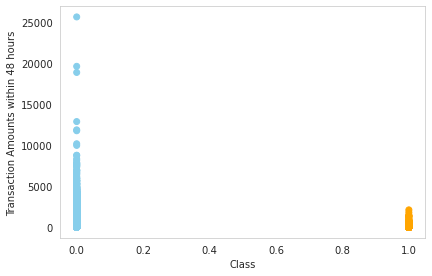

In [21]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.set_style("whitegrid", {'axes.grid' : False})
plt.xlabel('Class')
plt.ylabel('Transaction Amounts within 48 hours')
plt.tight_layout()
color= ['skyblue' if l == 0 else 'Orange' for l in df['Class']]
plt.scatter( df['Class'], df['Amount'],color=color)

<font size =5 color=blue> Inference: </font>
                    
- Above plots indicate that fraudulent transactions are at smaller values when compared to non-fraudulent transactions.

</br>

- Since, this Amount is a highly feature, we need to do the feature Engineer on the same. 


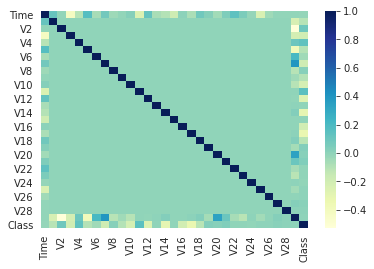

In [22]:
#Correlation plot.
corr = df.corr()
sns.heatmap(corr,cmap='YlGnBu')

<font size = 5 color = Blue> Inference: </font>
           

           
- Correlation between features is quite low. Because input data is already PCA Transformed.


In [23]:
# Features with absolute correlation:
# Sorted from High to low correlation.
df_corr  = df.drop("Class", axis=1).apply(lambda x: x.corr(df.Class)).abs().sort_values(ascending=False).to_frame().reset_index()
df_corr.columns = ['features','corr_values']
df_corr

,features,corr_values
0,V17,0.326481
1,V14,0.302544
2,V12,0.260593
3,V10,0.216883
4,V16,0.196539
5,V3,0.192961
6,V7,0.187257
7,V11,0.154876
8,V4,0.133447
9,V18,0.111485


In [24]:
#picking the list of features into "all_features":
all_features = list(df_corr['features'])
print(all_features)

['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18', 'V1', 'V9', 'V5', 'V2', 'V6', 'V21', 'V19', 'V20', 'V8', 'V27', 'Time', 'V28', 'V24', 'Amount', 'V13', 'V26', 'V15', 'V25', 'V23', 'V22']


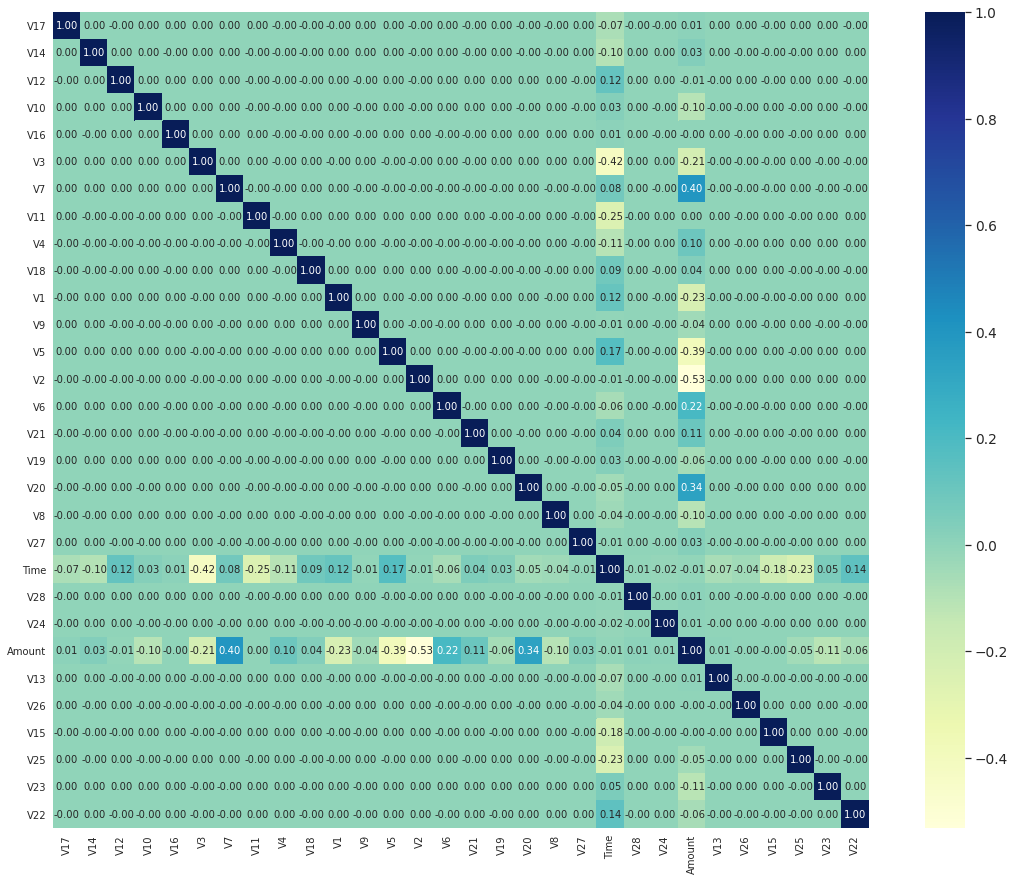

In [25]:
cols = df_corr['features']
cm = np.corrcoef(df[cols].values.T)
f,ax = plt.subplots(figsize=(20,15))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True, fmt = '.2f', annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values,cmap='YlGnBu')
plt.show()

<font size = 5 color = Blue> Inference: </font>
           
-  Given data is PCA Transformed, so even a single PCA component deletion might yield to multiple potential features.

</br>

-  Dropping the Time feature alone as of now, as it is not much value added.


In [26]:
#Dropping Time Feature:
df = df.drop(['Time'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<font size = 5 color = SkyBlue> Outliers check: </font>
          


Number of outliers below the lower bound:  0  (0.0%)
Number of outliers above the upper bound:  31904  (11.2%)


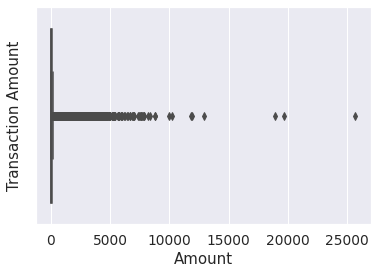

In [27]:
#Checking Outliers for Amount feature alone:
#Time lies within 48 hours, also we dropped the same.
#Rest of the features are PCA component.
sns.boxplot(df['Amount'], labels = ['Boxplot'])
plt.ylabel('Transaction Amount')
plt.plot()

amount = df[['Amount']].sort_values(by='Amount')
q1, q3 = np.percentile(amount,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

print('Number of outliers below the lower bound: ', amount[amount['Amount'] < lower_bound].count()[0],
     ' ({:.4}%)'.format(amount[amount['Amount'] < lower_bound].count()[0] / amount['Amount'].count() * 100))
print('Number of outliers above the upper bound: ', amount[amount['Amount'] > upper_bound].count()[0],
      ' ({:.4}%)'.format(amount[amount['Amount'] > upper_bound].count()[0] / amount['Amount'].count() * 100))

<font size = 5 color = Blue> Inference: </font>
    
    
- Here we have 11% of data is above upperbound, no action take as of now we are going to perform Feature Engineer on this feature


<font size = 5 color = SkyBlue> Feature Engineering: </font>


<font size = 5 color = Orange> Scaling: </font>  

- Here performing scaling on **Amount** feature, by examining different Scaling approaches we have:

In [28]:
#performing Log scaling:

df['amount_log'] = np.log(df.Amount + 0.01)

In [29]:
#performing Standard scaling:

from sklearn.preprocessing import StandardScaler # importing a class from a module of a library
 # object of the class StandardScaler ()
ss = StandardScaler()
df['amount_std_scaled'] = ss.fit_transform(df['Amount'].values.reshape(-1,1))

In [30]:
#performing Minmax scaling:

from sklearn.preprocessing import MinMaxScaler
# object of the class MinMaxScaler ()
mm = MinMaxScaler() 
df['amount_minmax'] = mm.fit_transform(df['Amount'].values.reshape(-1,1))

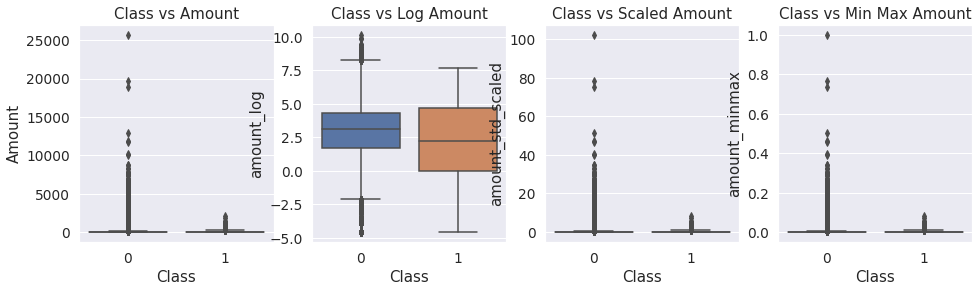

In [31]:
#Feature engineering to a better visualization of the values

# Let's explore the Amount by Class and see the distribuition of Amount transactions
fig , axs = plt.subplots(nrows = 1 , ncols = 4 , figsize = (16,4))

sns.boxplot(x ="Class",y="Amount",data=df, ax = axs[0])
axs[0].set_title("Class vs Amount")

sns.boxplot(x ="Class",y="amount_log",data=df, ax = axs[1])
axs[1].set_title("Class vs Log Amount")

sns.boxplot(x ="Class",y="amount_std_scaled",data=df, ax = axs[2])
axs[2].set_title("Class vs Scaled Amount")

sns.boxplot(x ="Class",y="amount_minmax",data=df, ax = axs[3])
axs[3].set_title("Class vs Min Max Amount")

# fig.suptitle('Amount by Class', fontsize=20)
plt.show()

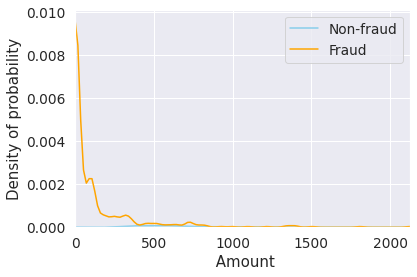

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [32]:
#DistPlot for Amount Feature:
target_0 = df.loc[df['Class'] == 0]
target_1 = df.loc[df['Class'] == 1]
ax1=sns.distplot(target_0[['Amount']], hist=False, color='skyblue', label='Non-fraud')
ax2=sns.distplot(target_1[['Amount']], hist=False, color='Orange', label='Fraud')
ax1.set_xlim(0, max(df[df['Class']==1]['Amount']))
ax2.set_xlim(0, max(df[df['Class']==1]['Amount']))
plt.legend()
plt.xlabel(' Amount')
plt.ylabel('Density of probability')
plt.show()

df.loc[df['Class'] == 1]['Amount'].describe()

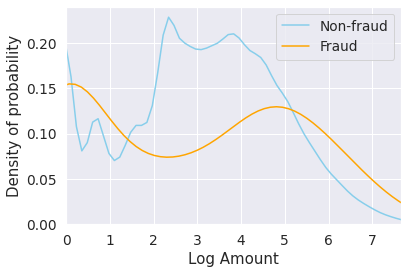

count    492.000000
mean       2.263329
std        2.967482
min       -4.605170
25%        0.009950
50%        2.225695
75%        4.662495
max        7.661941
Name: amount_log, dtype: float64

In [33]:
#DistPlot For LogAmount Feature:

target_0 = df.loc[df['Class'] == 0]
target_1 = df.loc[df['Class'] == 1]
ax1=sns.distplot(target_0[['amount_log']], hist=False, color='skyblue', label='Non-fraud')
ax2=sns.distplot(target_1[['amount_log']], hist=False, color='Orange', label='Fraud')
ax1.set_xlim(0, max(df[df['Class']==1]['amount_log']))
ax2.set_xlim(0, max(df[df['Class']==1]['amount_log']))
plt.legend()
plt.xlabel('Log Amount')
plt.ylabel('Density of probability')
plt.show()
#with this plot we can clearly see the 
df.loc[df['Class'] == 1]['amount_log'].describe()

<font size = 5 color = Blue> Inference: </font>
    
    
- From above Plots the LogTransformation seems the best choice, because the Amount Feature can easily distingushable with LogAmount feature than any other scaling options or Scaled_features.

In [34]:
#Data Frame Shape, post new amount feature:
#Post selection of best feature among them, we need to drop these not required scaling features.
df.shape

(284807, 33)

In [35]:
#Keeping amount_log, so dropping Amount Feature:
df = df.drop(['Amount','amount_std_scaled','amount_minmax'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,amount_log
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.008166
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.993252
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.936665
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.816322
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.248495


In [36]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,amount_log
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727,2.960364
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,1.950786
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-4.605170
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,1.724551
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,3.091497
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,4.346076
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,10.153903


In [37]:
#DF Shape, Post drop off unnecessary features:

df.shape

(284807, 30)


#scatter plot for these top 10 correlated features alone:
sns.set()
arr = req_features[:10]
sns.pairplot(df[arr], size = 2.5)
plt.show()


<font size = 5 color = SkyBlue> Data Splitting: </font>



In [38]:
### Splitting the data into train & test data

from sklearn import model_selection
from sklearn.model_selection import train_test_split

random.seed(33)

y= df['Class']
X = df.drop(columns=['Class'])
X.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount_log
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008166
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.993252
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936665
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816322
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248495


In [39]:
X.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount_log
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,2.960364
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.950786
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-4.605170
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,1.724551
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,3.091497
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,4.346076
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,10.153903


In [40]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=33)

# Preserving X_test & y_test to evaluate on the test data once model build completed:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount_log
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008166
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.993252
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936665
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816322
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248495


In [41]:
#validating the Target Feature Split :
print('Total Fraudlent records:')
print(np.sum(y))
print('Total Train Fraudlent records:')
print(np.sum(y_train))
print('Total Test Fraudlent records:')
print(np.sum(y_test))

Total Fraudlent records:
492
Total Train Fraudlent records:
341
Total Test Fraudlent records:
151


<font size = 5 color = SkyBlue> Skewness Check: </font>


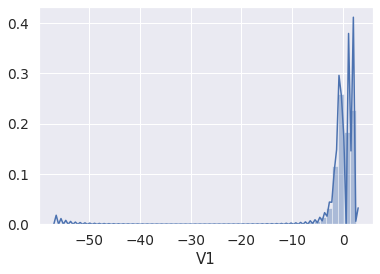

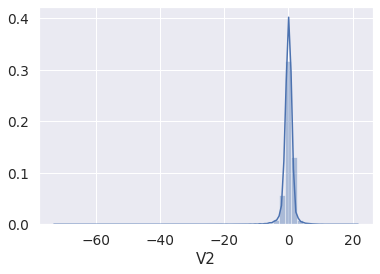

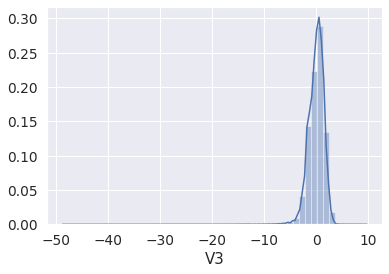

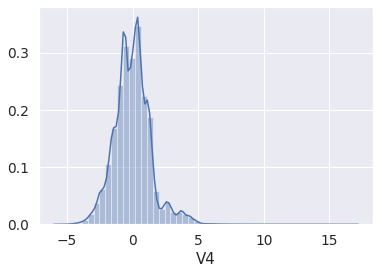

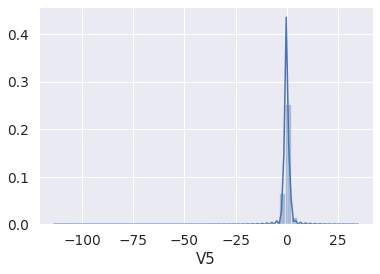

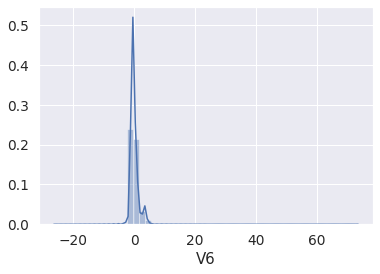

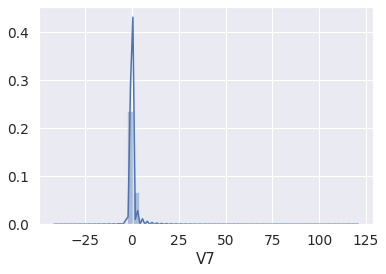

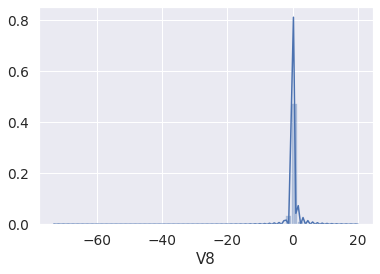

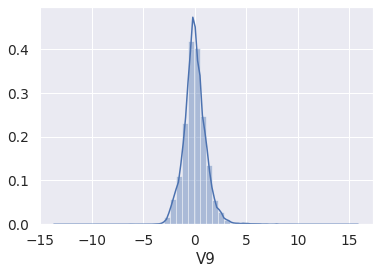

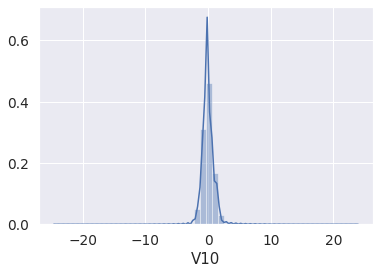

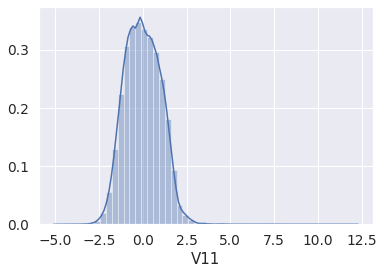

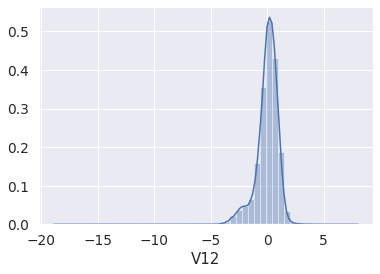

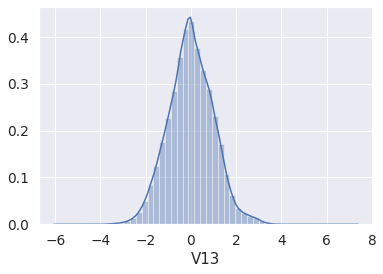

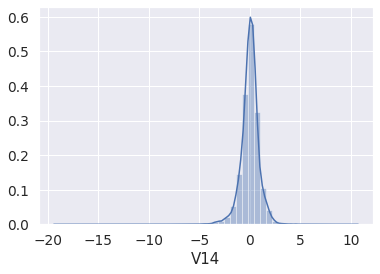

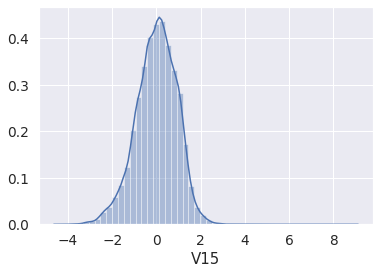

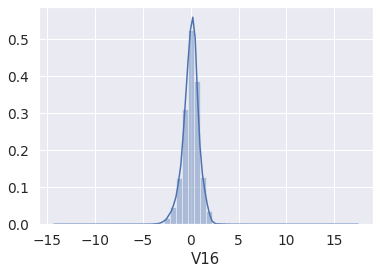

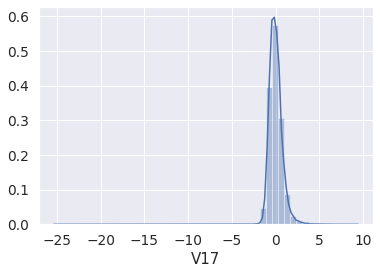

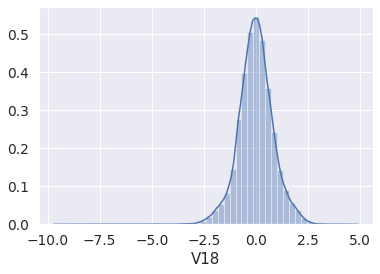

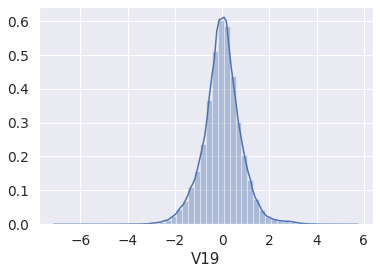

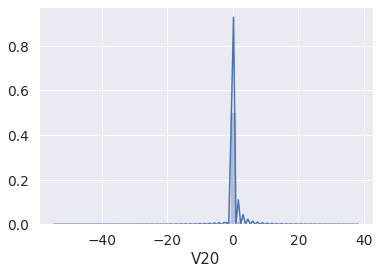

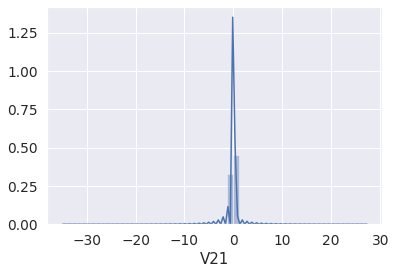

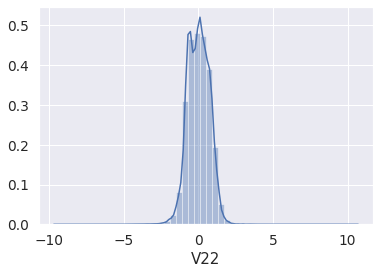

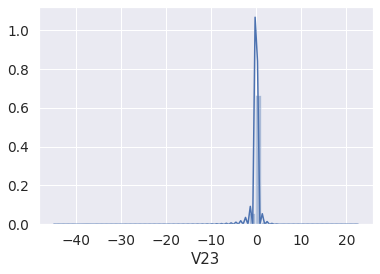

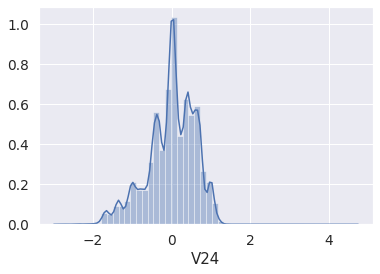

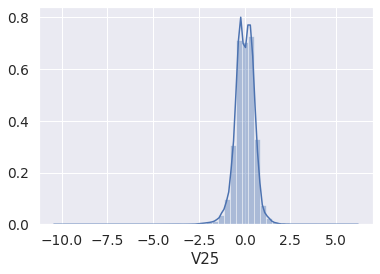

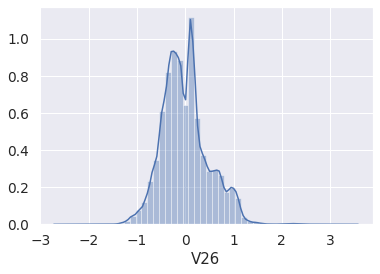

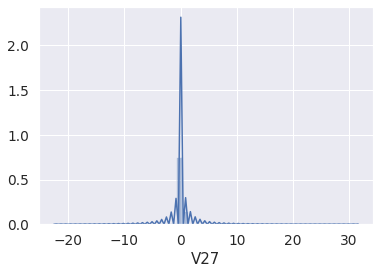

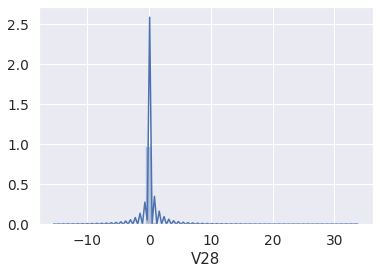

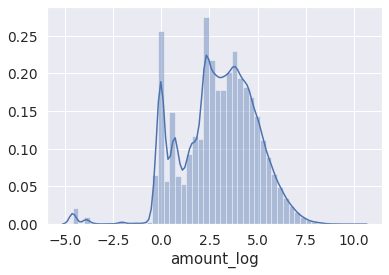

In [42]:
# plot the histogram of a variable from the dataset to see the skewness
# plot for all the columns post findout of relevant columns/featuers 
for col in X_train.select_dtypes('float'):
    #print(col)
    plt.figure()
    sns.distplot(X_train[col])

<font color = Blue Size = 5> Inference: </font>

- Here for Exmaple: V1 & amount_log features are skewed 

In [43]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
# To make distribution more gaussian
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
pt = PowerTransformer(copy=False)
pt.fit(X_train)                       ## Fit the PT on training data
X_train_pt = pt.transform(X_train)    ## Then apply on all data
X_test_pt = pt.transform(X_test)


#DataFrame out of Transformed PowerData:
X_train_pow = pd.DataFrame(data=X_train_pt, columns=X.columns)
print("Power transformed Train set (sample records): ")
X_train_pow.head()


Power transformed Train set (sample records): 


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount_log
0,1.449221,-0.169624,-1.156321,0.281854,0.203375,-0.694891,0.282021,-0.311362,0.303318,0.316098,0.408556,0.385509,-1.049458,0.823829,-1.111409,-0.347370,-0.494068,-0.184273,0.755680,-0.346721,0.003391,0.112651,0.040783,-0.573609,0.273319,1.158900,-0.278723,-0.264608,-0.401747
1,0.681123,-0.177317,-0.112456,-0.569432,-0.490559,-1.203318,0.107518,-0.329437,1.056733,-0.880619,-0.179667,0.199457,-0.646241,0.566858,1.956681,-0.670964,-0.223216,-0.155493,0.767864,-0.147645,-0.191712,-0.591611,-0.033510,0.556271,1.087330,-1.962363,0.075158,0.096836,0.159433
2,0.619721,-0.452799,0.204392,0.014900,-0.303783,0.739490,-0.580696,0.215530,1.203430,-0.440503,-1.966692,-0.172035,-0.151679,-0.616675,0.048828,-0.057899,-0.116623,-0.697755,0.768736,-0.008804,-0.367013,-0.841199,-0.166647,-1.855612,0.398956,1.947142,-0.085416,0.024276,0.467343
3,0.960458,-0.646673,0.023232,-1.055434,-0.931749,-0.534694,-0.731089,-0.288752,-1.789805,1.289382,-0.882209,-1.065002,0.716421,-0.453887,0.618073,-0.375197,0.351720,0.104418,-0.060889,-0.408718,-0.325783,-0.430988,-0.052112,-0.319145,0.884466,-0.294057,0.063772,0.061911,-0.401231
4,-0.611936,0.035462,1.313293,-2.130517,-0.324253,-0.991032,0.511132,-0.340877,-0.741387,-0.925100,-0.283255,0.825931,1.618168,-0.295082,0.879927,-1.988395,-0.372947,1.502474,-0.911722,-0.432168,-0.438976,-0.657624,-0.357357,0.589887,1.147751,-1.964723,0.207526,0.250092,0.260907


In [44]:
X_train_pow.min()

V1            -8.363312
V2           -23.445970
V3           -12.832895
V4            -5.026034
V5           -72.545046
V6           -40.601013
V7           -33.521458
V8           -28.276335
V9           -16.420688
V10          -31.137040
V11           -5.427484
V12           -7.296042
V13           -6.036464
V14          -12.220544
V15           -4.078843
V16          -10.312994
V17          -21.540409
V18          -10.128518
V19           -8.951048
V20          -66.517484
V21          -61.117992
V22          -11.783058
V23          -58.661268
V24           -3.520833
V25          -14.507884
V26           -7.994694
V27          -44.878651
V28          -61.059436
amount_log    -3.037194
dtype: float64

In [45]:
#DataFrame out of Transformed PowerData:
X_test_pow = pd.DataFrame(data=X_test_pt, columns=X.columns)
print("Power transformed Test set (sample records): ")
X_test_pow.head()

Power transformed Test set (sample records): 


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount_log
0,-0.667344,0.058466,-0.184888,-0.419401,1.517804,-0.519106,0.450470,-0.235754,-0.066576,-0.303645,0.844305,0.354900,0.088615,-1.149997,-0.868647,0.599804,-0.160149,0.371933,0.331260,0.008038,-0.582646,-1.279606,-0.444321,0.267211,-0.007999,0.425731,-0.008999,-0.696350,-0.307018
1,-0.188449,0.414503,-1.129631,-1.147644,2.299110,2.113261,0.302290,0.909420,-0.096486,-0.741074,0.180723,-0.347502,-0.423787,-0.830186,0.115256,0.179854,0.390432,-0.461304,-0.485815,0.060303,-0.447650,-1.238597,0.178424,1.015728,-0.827966,0.427206,0.601297,0.230310,-0.805427
2,-0.384328,0.595677,-0.121215,-0.563179,0.460254,-0.396837,0.733466,-0.121778,-0.071501,0.093271,0.529524,1.013167,0.344965,0.085344,-1.177798,0.138952,-0.991041,-0.238081,0.402221,0.160493,-0.347977,-0.733101,0.006590,-0.734351,-0.795945,0.397313,0.892129,0.438153,-0.516338
3,-0.611633,0.101682,0.438910,0.826581,0.430894,-0.283281,0.958835,-0.474866,0.641938,0.644802,-1.389243,-1.189808,-2.081930,-0.153474,-0.183237,-1.226054,0.019542,0.071340,0.854584,0.310254,0.035829,1.112659,-0.114029,-0.167530,-0.242987,-0.779876,0.665637,-0.305969,0.728792
4,1.131936,-0.455074,0.001091,0.870648,-0.596000,0.449985,-0.779653,0.193276,0.907667,0.303876,0.530755,1.303612,0.663943,-0.268644,0.474738,1.357325,-1.533398,1.426065,-0.745840,-0.042115,0.501492,1.393726,0.113381,-0.832294,-0.669863,-1.345757,0.183057,-0.034297,0.763537


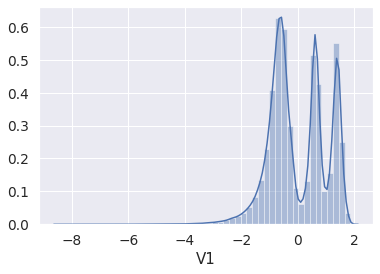

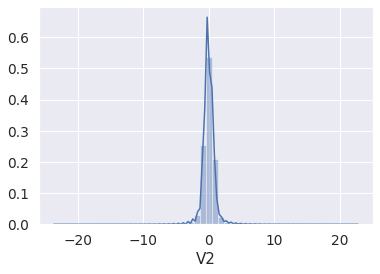

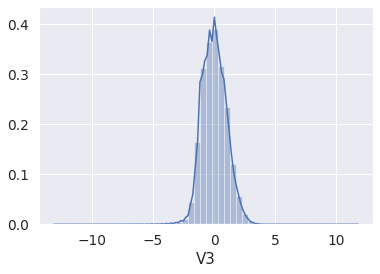

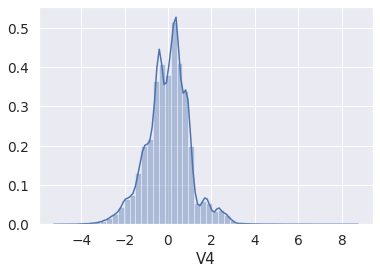

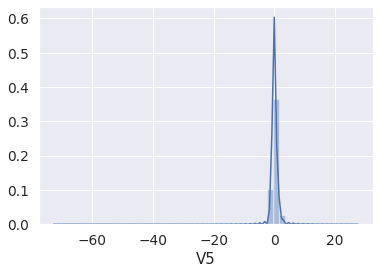

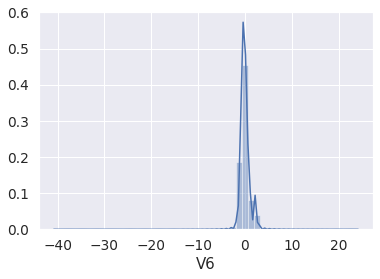

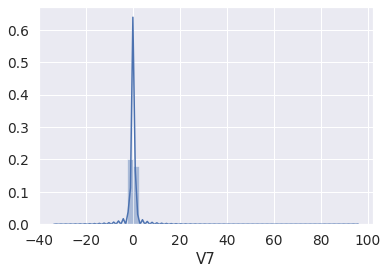

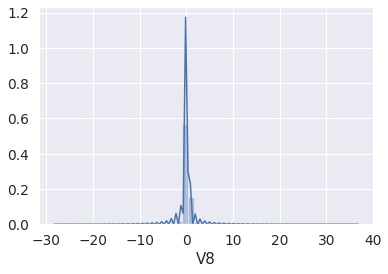

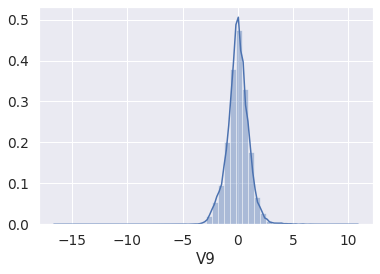

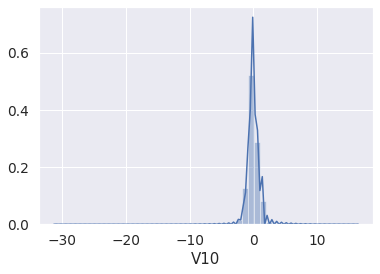

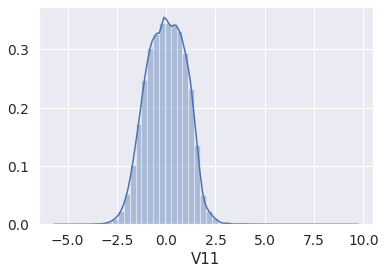

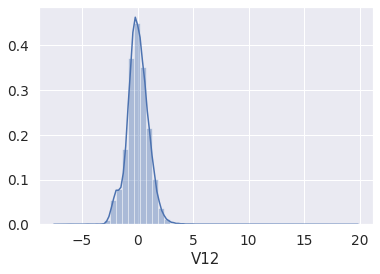

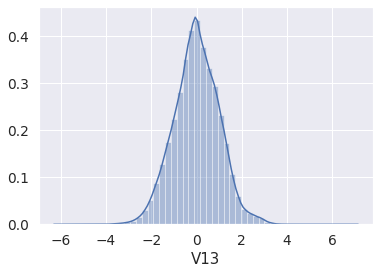

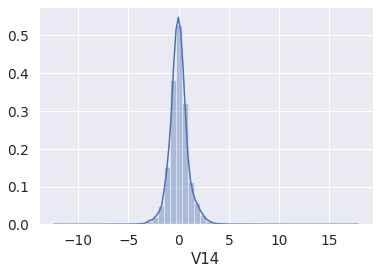

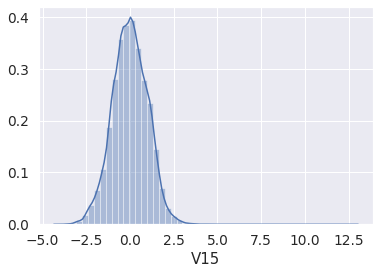

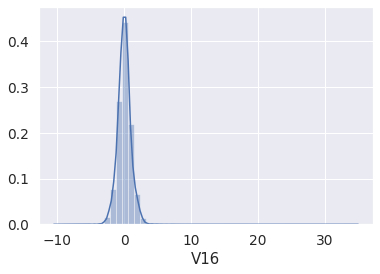

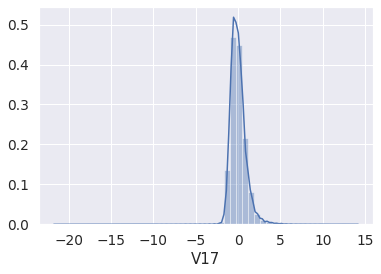

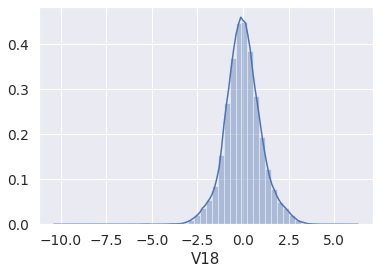

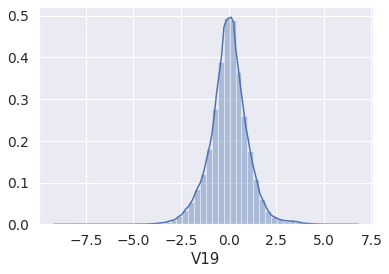

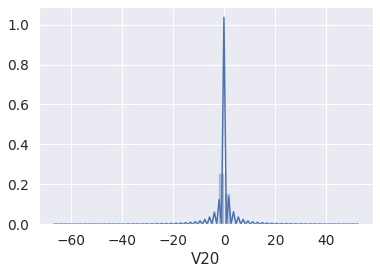

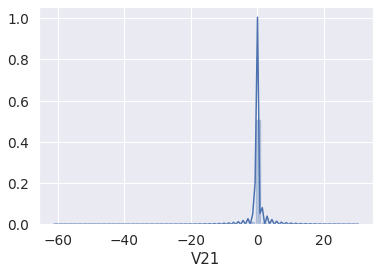

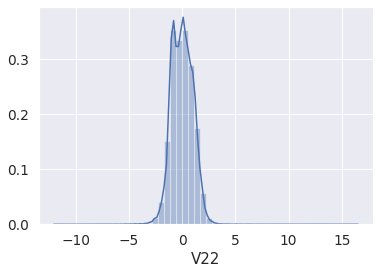

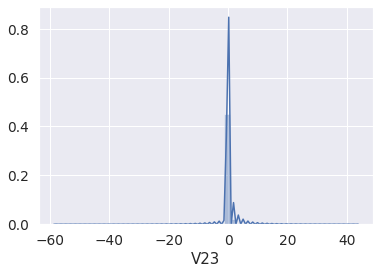

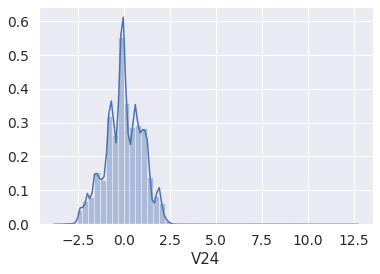

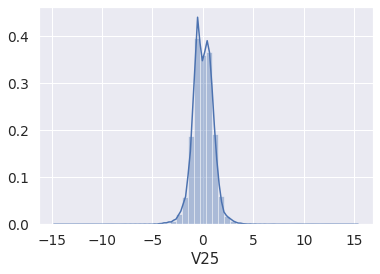

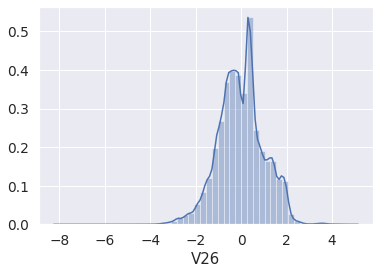

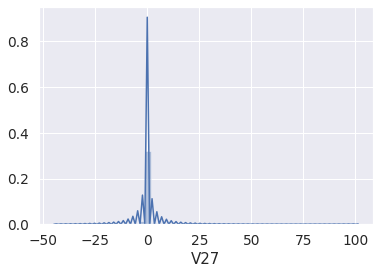

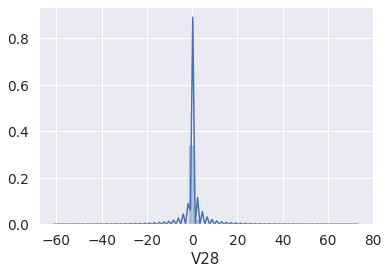

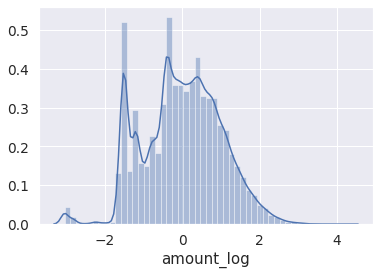

In [46]:
# plot the histogram of a variable from the dataset to see the skewness, Post PowerTransformation:
for col in X_train_pow.select_dtypes('float'):
    #print(col)
    plt.figure()
    sns.distplot(X_train_pow[col])


<font color = Blue Size = 5> Inference: </font>
- Post powerTransformation data becam Gaussian, We can clearly observe that **Amount_log & V1** features are Gaussian now.


## Model Building
> Build different models on the imbalanced dataset and see the result

In [47]:
from IPython.display import Markdown, display ,HTML
# Function to print Confusion matrix, accuracy, sensitivity, specificity, 
# false postive rate, positive predictive value, Negative predictive value
def compute_and_print_metrics_from_confusion_matrix(y_test, y_pred):
    # Confusion matrix 
    confusion = metrics.confusion_matrix( y_test, y_pred )
    print('Confusion matrix')
    print(confusion)
    
    #Let's check the overall accuracy.
    overall_accuracy = metrics.accuracy_score( y_test, y_pred )
    print('\nOverall accuracy = ', overall_accuracy)


    TP = confusion[1, 1] # true positive  
    TN = confusion[0, 0] # true negatives
    FP = confusion[0, 1] # false positives
    FN = confusion[1, 0] # false negatives

    print(f'True positive = {TP}, true negatives = {TN}, false positives = {FP}, false negatives = {FN}')

    # sensitivity
    sensitivity = TP / float(TP+FN)
    print('\nSensitivity = ', sensitivity)

    # specificity
    specificity = TN / float(TN+FP)
    print('specificity = ', specificity)

    # false postive rate
    FPR = FP/ float(TN+FP)
    print('\nFalse postive rate = ', FPR)

    # positive predictive value 
    PPV = TP / float(TP+FP)
    print('positive predictive value = ', PPV)

    # Negative predictive value
    NPV = TN / float(TN+ FN)
    print('Negative predictive value = ', NPV)
    

    # Printing the header 
def header(string):
    display(Markdown("------ "))
    display(Markdown("### "+string))

#Evaluating the metrics precisoon, recall,accuracy and roc score    
def print_model_metrics(y_test,y_pred,model_name):
    header(model_name+" Model Stats Scores Summary : ")
    cp = confusion_matrix(y_test,y_pred)
    plt.figure()
    plot_confusion_matrix(cp)
    plt.show()
    from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score,accuracy_score
    accuracy = round(accuracy_score(y_test,y_pred),2)
    recall = round(recall_score(y_test,y_pred),2)
    precision = round(precision_score(y_test,y_pred),2)
    auc = round(roc_auc_score(y_test,y_pred),2)
    f1 = round(f1_score(y_test,y_pred),2)
    
    data = [[model_name,accuracy,precision,recall,auc,f1]] 
    df = pd.DataFrame(data, columns = ['Model', 'Accuracy','Precision','Recall','AUC_ROC','F1'])
    add_to_global_summary(df)
    return df 

def add_to_global_summary(df) :
    global consolidate_summary 
    consolidate_summary = consolidate_summary.append(df,ignore_index=True)
    
def draw_roc( actual, probs ):

    # Restore the rc params from Matplotlib’s internal defaults.
    plt.rcdefaults()
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

def plot_confusion_matrix(cm):
    """
    This function prints and plots the confusion matrix.
    """
    classes=[0,1]
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    

In [84]:
def plot_CM_and_ROC_curve(Classifier,X_train, y_train, X_test, y_test):
#'''Plots the ROC curve and the confusion matrix, and calculates AUC, recall and precision.'''
    
    mean_fpr = np.linspace(0, 1, 100)
    name = Classifier[0][0]
    model= Classifier[0][1]
    class_names = ['Non-Fraud', 'Fraud']
    confusion_matrix_total = [[0, 0], [0, 0]]
    
    #Obtain probabilities for each class
    probas_ = model.fit(X_train, y_train).predict_proba(X_test)
    
# Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, alpha=1, color='b', label='ROC (AUC = %0.7f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve - model: ' )
    plt.legend(loc="lower right")
    plt.show()
      
#Store the confusion matrix result to plot a table later
    y_pred=model.predict(X_test)
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrix_total += cnf_matrix
    
#Print precision and recall
    tn, fp = confusion_matrix_total.tolist()[0]
    fn, tp = confusion_matrix_total.tolist()[1]
    
    accuracy = metrics.accuracy_score(y_test, y_pred)                               
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score=metrics.f1_score(y_test, y_pred)
                                  
    '''print('Accuracy = {:2.2f}%'.format(accuracy*100))
    print('Precision = {:2.2f}%'.format(precision*100))
    print('Recall = {:2.2f}%'.format(recall*100))
    print('f1_score = {:2.2f}%'.format(f1_score*100))
    print('roc_auc = {:2.2f}%'.format(roc_auc*100))
    '''
   
# Plot confusion matrix
    plt.figure()
    confusion_matrix_plot(confusion_matrix_total, classes=class_names, title='Confusion matrix - model: ' + name)
    plt.show()

    data = [[name,roc_auc,accuracy,precision,recall,f1_score]] 
    df = pd.DataFrame(data, columns = ['Model', 'AUC','Accuracy','Precision','Recall','F1'])
    add_to_global_summary(df)
    print(df)
    return(df)


In [72]:
def confusion_matrix_plot(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Tune hyper parameters for Logistic regression with cross validated data 
def LR_hp_tuning(X_train,y_train) :
    model=LogisticRegression()
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    c_values = [100, 10, 1.0, 0.1, 0.01]
    penalty = ['l1', 'l2', 'elasticnet']
    # define grid search
    grid = dict(solver=solvers,C=c_values,penalty=penalty)
    grid_search = RandomizedSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=4, scoring='roc_auc',error_score=0)
    grid_result = grid_search.fit(X_train, y_train)
    print("\n Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

def lr_model(model,X_train,y_train,X_test,y_test,C=1.0, penalty='l2', solver= 'lbfgs',prob=1) :
    classifier=[]
    lr = LogisticRegression(C=C, penalty=penalty, solver= solver,random_state=33,class_weight='balanced')
    #lr.fit(X_train,y_train)
    classifier.append([model,lr])

    plot_CM_and_ROC_curve(classifier, X_train, y_train, X_test, y_test)

In [50]:

def add_to_global_summary(df) :
    global consolidate_summary 
    consolidate_summary = consolidate_summary.append(df,ignore_index=True)

In [51]:
consolidate_summary = pd.DataFrame()

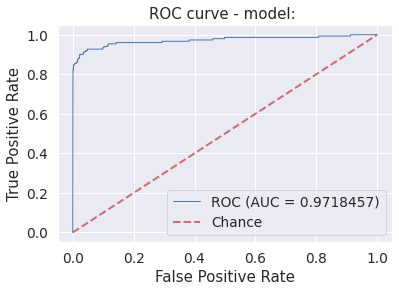

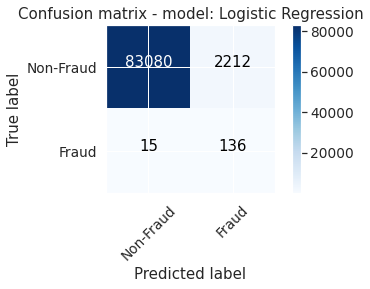

                 Model       AUC  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.971846  0.973936   0.057922  0.900662  0.108844


In [52]:
# Build logistic regression model with default parameter and regular train data
lr_model('Logistic Regression',X_train_pow,y_train,X_test_pow,y_test) 

In [55]:
LR_hp_tuning(X_train_pow,y_train)

TypeError: __init__() got an unexpected keyword argument 'param_grid'

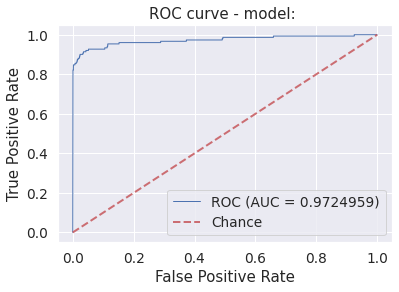

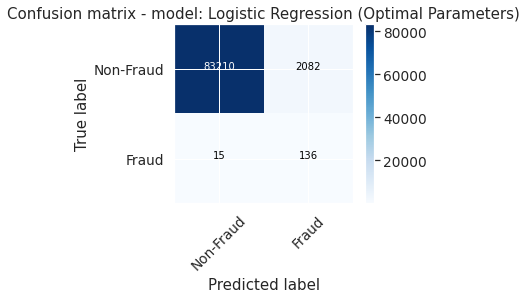

                                      Model       AUC  Accuracy  Precision  \
0  Logistic Regression (Optimal Parameters)  0.972496  0.975457   0.061317   

     Recall        F1  
0  0.900662  0.114816  


In [56]:
# Build logistic regression model with optimal parameters
lr_model('Logistic Regression (Optimal Parameters)',X_train_pow,y_train,X_test_pow,y_test,C=0.01, penalty='l2',solver= 'liblinear')  

In [57]:
# Classification report 'Class' wise metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
predicted =cross_val_predict(LogisticRegression(), X,y, cv=10)
print ("Accuracy: ",metrics.accuracy_score(y, predicted))
print("Classification Report: \n",metrics.classification_report(y,predicted))

Accuracy:  0.9991116791370999
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.86      0.58      0.69       492

    accuracy                           1.00    284807
   macro avg       0.93      0.79      0.85    284807
weighted avg       1.00      1.00      1.00    284807



Cross Validation


In [58]:
cv1 = StratifiedKFold(n_splits=4, shuffle=True, random_state=33)
# enumerate the splits and summarize the distributions
###for train_ix, test_ix in kfold.split(X, y):
	# select rows
feature=X
target=y
for train_index, test_index in cv1.split(feature, target):

    X_train_cv = feature.iloc[train_index]
    X_test_cv = feature.iloc[test_index]
    y_train_cv = target.iloc[train_index]
    y_test_cv = target.iloc[test_index]

X_train_cv.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount_log
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008166
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.993252
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816322
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,3.708927
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,4.534855


In [59]:
# Apply Power transformer on cross validation data
pt.fit(X_train_cv)                       ## Fit the PT on training data
X_train_cv_pt = pt.transform(X_train_cv)    ## Then apply on all data
X_test_cv_pt = pt.transform(X_test_cv)


#DataFrame out of Transformed PowerData:
X_train_cv_pow = pd.DataFrame(data=X_train_cv_pt, columns=X.columns)
print("Power transformed Cross validation Train set (sample records): ")
X_train_cv_pow.head()

Power transformed Cross validation Train set (sample records): 


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount_log
0,-0.905704,-0.132224,2.177460,0.983439,-0.256850,0.451569,0.193406,0.020018,0.380356,0.124074,-0.510110,-0.775450,-0.999509,-0.405695,1.714369,-0.600799,0.214691,0.008907,0.502474,0.328764,-0.007472,0.367548,-0.191748,0.016718,0.211972,-0.326511,0.323431,-0.053571,1.090298
1,0.626450,0.093264,-0.035991,0.389338,0.029079,0.040131,-0.062226,0.006347,-0.185564,-0.117981,1.524745,1.302582,0.497963,-0.233112,0.677310,0.491697,-0.175464,-0.239714,-0.170709,-0.093984,-0.302689,-0.885462,0.153610,-0.635072,0.288500,0.350336,-0.033378,0.056907,-1.047699
2,-0.743372,-0.203773,1.401404,-0.578840,-0.021651,0.976466,0.191810,0.310383,-1.317899,-0.011882,-0.176170,0.026039,0.516515,-0.382093,-0.718876,-1.193580,-0.825270,2.442768,-1.531269,-0.276219,-0.134826,-0.012854,-0.320524,-1.756515,1.276738,-0.402439,0.145635,0.200530,0.979770
3,-0.598482,0.946635,0.715890,-0.287125,0.678196,0.427097,0.899701,-2.921637,0.598952,1.143067,-0.581070,0.166795,1.747096,-1.351221,0.738087,-0.168338,-1.408246,-0.445047,0.405827,-0.209015,2.577411,-1.383352,0.081729,-1.077600,-0.812858,-0.019330,-2.912062,-3.506940,0.355464
4,-0.712036,0.107017,-0.234674,-0.119584,1.960853,2.376679,0.298148,0.842382,-0.316407,-0.352840,-0.671182,-0.299456,-0.280036,0.002159,-0.407779,-0.319353,-0.619249,0.120612,0.704097,0.066302,-0.085340,-0.387282,-0.342888,1.910140,0.704545,-0.791903,0.018272,0.447556,0.818824


In [60]:
#DataFrame out of Transformed PowerData:
X_test_cv_pow = pd.DataFrame(data=X_test_cv_pt, columns=X.columns)
print("Power transformed cross validation test set (sample records): ")
X_test_cv_pow.head()

Power transformed cross validation test set (sample records): 


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount_log
0,-0.905129,-0.875615,1.381628,0.343313,-0.374321,1.316003,0.635964,0.172893,-1.451450,0.231437,0.643275,-0.106211,0.724368,-0.256337,2.876422,-2.802998,1.383632,-0.166381,-2.842803,0.691983,0.362880,1.071753,1.515811,-1.131539,-0.653654,-0.212684,-0.148602,-0.173587,1.634172
1,-0.824335,0.532178,1.160664,0.359011,-0.305975,0.180678,0.476827,-0.334195,0.771215,0.717384,-0.796018,0.497161,1.343742,-1.171161,0.140191,-0.580784,-0.318607,-0.067539,0.985456,0.537152,0.005027,1.110144,-0.235350,0.147126,-0.429282,1.051864,0.540143,0.667801,0.656621
2,-0.492324,0.594220,0.776538,-0.042906,0.291091,0.082316,0.383215,0.186112,-0.488296,-0.314829,1.287869,0.255219,-0.352890,-0.226136,0.536859,0.411789,-0.108285,0.060315,-0.031869,0.108797,-0.277541,-0.780243,-0.055323,-0.681980,-0.479047,0.310184,0.627370,0.260611,-0.899670
3,0.659519,0.008305,-0.124249,0.875099,0.124496,0.314020,-0.003077,0.002445,0.468904,-0.053681,-1.441228,-0.344313,-0.753292,0.106424,0.000127,-0.572460,-0.035407,-0.739615,-0.047111,-0.291398,-0.219507,-0.390837,-0.262205,-1.253335,1.496104,-0.485228,0.075076,0.027443,-0.749471
4,-0.447487,0.714982,0.688828,-0.082806,0.348292,-0.095185,0.523842,-0.009242,-0.654459,-0.310394,1.000621,0.936984,1.010390,-0.538056,0.112066,0.856272,-0.665635,0.556685,0.560474,0.265639,-0.333078,-0.878909,-0.208434,-0.702078,-0.172684,0.286479,0.608031,0.266713,-0.898356


In [61]:

#DataFrame out of Transformed PowerData:
y_train_cv = pd.DataFrame(data=y_train_cv, columns=['Class'])
print("Power transformed Cross validation Train set (sample records): ")
y_train_cv.head()

Power transformed Cross validation Train set (sample records): 


,Class
0,0
1,0
3,0
7,0
8,0


In [62]:

#DataFrame out of Transformed PowerData:
y_test_cv = pd.DataFrame(data=y_test_cv, columns=['Class'])
print("Power transformed Cross validation Train set (sample records): ")
y_test_cv.head()

Power transformed Cross validation Train set (sample records): 


,Class
2,0
4,0
5,0
6,0
9,0


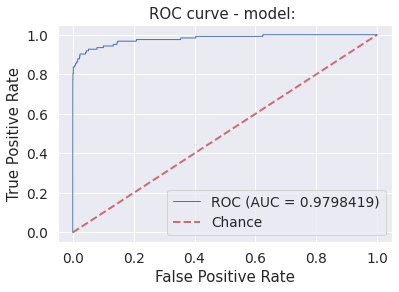

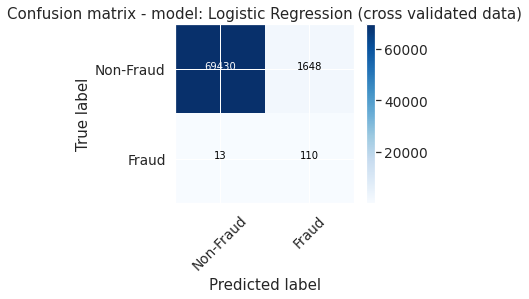

                                        Model       AUC  Accuracy  Precision  \
0  Logistic Regression (cross validated data)  0.979842  0.976672   0.062571   

     Recall        F1  
0  0.894309  0.116959  


In [63]:
# Build logistic regression model with default parameter
lr_model('Logistic Regression (cross validated data)',X_train_cv_pow,y_train_cv,X_test_cv_pow,y_test_cv)

In [64]:
LR_hp_tuning(X_train_cv_pow,y_train_cv)

TypeError: __init__() got an unexpected keyword argument 'param_grid'

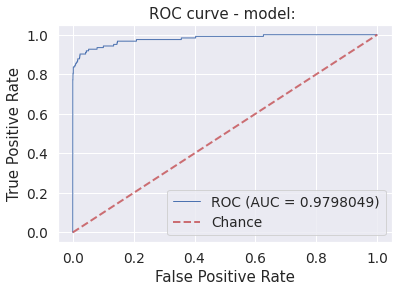

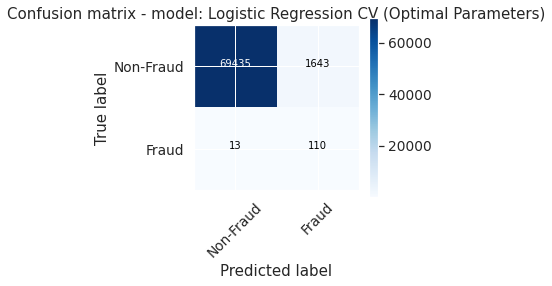

                                         Model       AUC  Accuracy  Precision  \
0  Logistic Regression CV (Optimal Parameters)  0.979805  0.976742    0.06275   

     Recall        F1  
0  0.894309  0.117271  


In [65]:
# Build logistic regression model with best parameters post tuning hyper parameters
lr_model('Logistic Regression CV (Optimal Parameters)',X_train_cv_pow,y_train_cv,X_test_cv_pow,y_test_cv,C=0.1,penalty='l2' , solver= 'liblinear')  

SVM:

In [66]:
from sklearn import svm

In [ ]:

classifier = svm.SVC(kernel='linear')
classifier.fit(X_train_cv_pow, y_train_cv)
y_pred_svc = classifier.predict(X_test_cv_pow)
y_pred_svc
cm = confusion_matrix(y_test_cv, y_pred_svc)
class_names=np.array(['0','1'])

In [82]:
from sklearn.calibration import CalibratedClassifierCV

def SVM_model(model,X_train,y_train,X_test,y_test,kernel_pass):
    
    classifier=[]
    if model == 'BEST':
        model='SVM(Best hyper parameters)'
        svm0=svm.best_estimator_
    else:
        svm0 = svm.SVC(probability=True,kernel=kernel_pass)
        svm0.fit(X_train, y_train)
    classifier.append([model,svm0])
    plot_CM_and_ROC_curve(classifier, X_train, y_train, X_test, y_test)

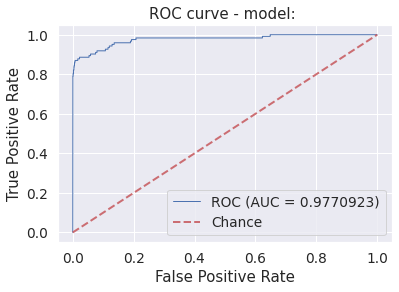

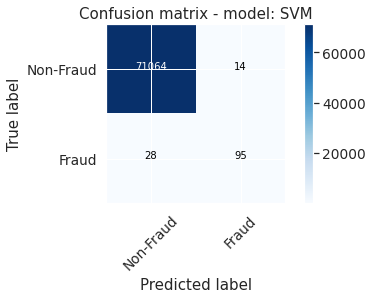

  Model       AUC  Accuracy  Precision    Recall        F1
0   SVM  0.977092   0.99941    0.87156  0.772358  0.818966


In [85]:
SVM_model('SVM',X_train_cv_pow,y_train_cv,X_test_cv_pow,y_test_cv,'linear')

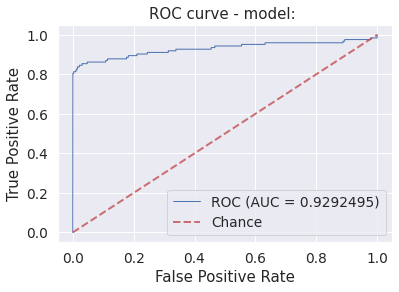

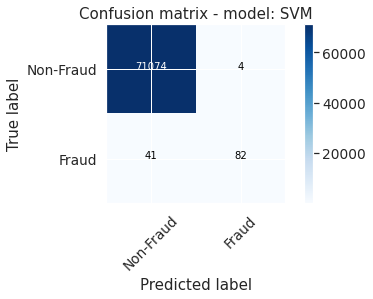

  Model       AUC  Accuracy  Precision    Recall        F1
0   SVM  0.929249  0.999368   0.953488  0.666667  0.784689


In [86]:
SVM_model('SVM',X_train_cv_pow,y_train_cv,X_test_cv_pow,y_test_cv,'rbf')

In [ ]:
# Printing metrics using user defined function
compute_and_print_metrics_from_confusion_matrix(y_test_cv, y_pred_svc)
print(classification_report(y_test_cv, y_pred_svc))
print_model_metrics(y_test_cv, y_pred_svc,"SVM with rbf Kernel ")

### Inference


### Decision Tree Model

In [ ]:
# Define a function to build Decision Tree model
def DT_model(model,X_train,y_train,X_test,y_test):
    
    classifier=[]
    if model == 'BEST':
        model='Decision Tree(Best hyper parameters)'
        dt0=tree.best_estimator_
    else:
        dt0 = DecisionTreeClassifier(random_state=33)
    dt0.fit(X_train, y_train)
    classifier.append([model,dt0])
    plot_CM_and_ROC_curve(classifier, X_train, y_train, X_test, y_test)

In [ ]:
def DT_hp_tuning(param,X_train,y_train,cv1):
# parameters to build the model on
  if param == 'max_depth':
    parameters = {'max_depth': range(5, 40,5)
                  }
    elif param == 'min_samples_leaf':
     parameters = {
                  'min_samples_leaf': range(5, 50, 5)
                   }
    else:
     parameters = {
                  'min_samples_split': range(5, 200, 20)
                  }
    dtree=DecisionTreeClassifier(random_state=33)
    # fit tree on training data
    tree = RandomizedSearchCV(dtree, parameters, 
                      cv=cv1, 
                    scoring="roc_auc",return_train_score=True,n_jobs=-1,verbose=2)
    tree.fit(X_train, y_train)
    scores = tree.cv_results_
    pd.DataFrame(scores).head()
    # plotting accuracies with min_samples_split
    plt.figure()
    if param == 'min_samples_split' :
    plt.plot(scores["param_min_samples_split"], 
            scores["mean_train_score"], 
            label="training accuracy")
    plt.plot(scores["param_min_samples_split"], 
            scores["mean_test_score"], 
            label="test accuracy")
    plt.xlabel("min_samples_split")
    # plotting accuracies with max_depth
    elif param == 'max_depth':
    plt.plot(scores["param_max_depth"], 
            scores["mean_train_score"], 
            label="training accuracy")
    plt.plot(scores["param_max_depth"], 
            scores["mean_test_score"], 
            label="test accuracy")
    plt.xlabel("max_depth")
    else:
    # plotting accuracies with min_samples_leaf
    plt.plot(scores["param_min_samples_leaf"], 
            scores["mean_train_score"], 
            label="training accuracy")
    plt.plot(scores["param_min_samples_leaf"], 
            scores["mean_test_score"], 
            label="test accuracy")
    plt.xlabel("min_samples_leaf")

    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()


In [ ]:
def Optimal_Cutoff(model,X,y):
    # Funtion to predict the churn using the input probability cut-off
    y_predicted = model.predict_proba(X)[:,1]
    
    data= pd.DataFrame({'Class':y, 'Class_prob':y_predicted})
 
    #Function to find the optimal cutoff for classifing as churn/non-churn
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        data[i] = data.Class_prob.map( lambda x: 1 if x > i else 0)
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

    prob = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in prob:
        cm1 = metrics.confusion_matrix(data.Class, data[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
    plt.show()

In [ ]:
def DT_hyperp_tuning(X_train,y_train,cv1) :
    DT_hp_tuning('max_depth',X_train,y_train, cv1)
    DT_hp_tuning('min_samples_leaf',X_train,y_train, cv1)
    DT_hp_tuning('min_samples_split',X_train,y_train, cv1)


In [ ]:
 # Build decision tree with all default parameters
DT_model('Decision Tree',X_train_cv_pow,y_train_cv,X_test_cv_pow,y_test_cv) 

In [ ]:
DT_hyperp_tuning(X_train_cv_pow,y_train_cv,cv1)

In [ ]:
# Create the parameter grid with a fine tuned range for each parameter
param_grid = {
    'max_depth': [5,10,20],
    'min_samples_leaf':[50,60,70],
    'min_samples_split': [25,50,100,175],
    'criterion': ["entropy", "gini"]
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state=33)
tree = RandomizedSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = cv1, verbose = 1,n_jobs=-1,scoring="roc_auc")

# Fit the grid search to the data
tree.fit(X_train_cv_pow, y_train_cv)

In [ ]:
print('We can get accuracy of',tree.best_score_,'using',tree.best_params_)

In [ ]:
#Running DT with best parameters
tree_final=tree.best_estimator_

tree_final.fit(X_train_cv_pow,y_train_cv)

In [ ]:
#Running DT with best parameters
DT_model('BEST',X_train_cv_pow,y_train_cv,X_test_cv_pow,y_test_cv) 

In [ ]:
# Printing the header 
def header(string):
    display(Markdown("------ "))
    display(Markdown("### "+string))

#Evaluating the metrics precisoon, recall,accuracy and roc score    
def print_model_metrics(y_test,y_pred,model_name):
    header(model_name+" Model Stats Scores Summary : ")
    cp = confusion_matrix(y_test,y_pred)
    plt.figure()
    plot_confusion_matrix(cp)
    plt.show()
    from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score,accuracy_score
    accuracy = round(accuracy_score(y_test,y_pred),2)
    recall = round(recall_score(y_test,y_pred),2)
    precision = round(precision_score(y_test,y_pred),2)
    auc = round(roc_auc_score(y_test,y_pred),2)
    f1 = round(f1_score(y_test,y_pred),2)
    
    data = [[model_name,accuracy,precision,recall,auc,f1]] 
    df = pd.DataFrame(data, columns = ['Model', 'Accuracy','Precision','Recall','AUC','F1'])
    add_to_global_summary(df)
    return df 

def add_to_global_summary(df) :
    global consolidate_summary 
    consolidate_summary = consolidate_summary.append(df,ignore_index=True)

In [ ]:
def draw_roc( actual, probs ):

    # Restore the rc params from Matplotlib’s internal defaults.
    plt.rcdefaults()
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
def plot_confusion_matrix(cm):
    """
    This function prints and plots the confusion matrix.
    """
    classes=[0,1]
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Inference:
    
In this case we are gonna try to minimize the number of errors in our prediction results. Errors are on the anti-diagonal of the confusion matrix. But we can infer that being wrong about an actual fraud is far worse than being wrong about a non-fraud transaction.

That is why using the accuracy as only classification criterion could be considered unthoughtful. During the remaining part of this study our criterion will consider precision on the real fraud 4 times more important than the general accuracy. Even though the final tested result is accuracy.

### RandomForestClassifier


In [ ]:
def rfc_model(model,X_train,y_train,X_test,y_test) :
    classifier=[]
    if model == 'BEST':
        model='Random forest(Best hyper parameters)'
        rfc=clf_rfc_cv.best_estimator_
    else:
        rfc = RandomForestClassifier(n_jobs=-1, random_state=33,verbose=1)
    rfc.fit(X_train, y_train)
    classifier.append([model,rfc])
    plot_CM_and_ROC_curve(classifier, X_train, y_train, X_test, y_test)
    

In [ ]:
rfc_model('Random Forest Classifier',X_train_cv_pow,y_train_cv,X_test_cv_pow,y_test_cv)

In [ ]:
#Hyper parameter tuning for RFC
param = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 4, 7, 9]}
rfc = RandomForestClassifier(n_jobs=-1, random_state=33)
clf_rfc_cv = RandomizedSearchCV(rfc, param, cv=4,scoring='roc_auc', n_jobs=-1)
clf_rfc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_rfc_cv.best_params_)
print("accuracy :",clf_rfc_cv.best_score_)



In [ ]:
rfc_model('BEST',X_train_cv_pow,y_train_cv,X_test_cv_pow,y_test_cv)

##XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
from scipy import stats
def xgb_model(model,X_train,y_train,X_test,y_test) :
    classifier=[]
    if model == 'BEST':
        model='XG Boost(Best hyper parameters)'
        xgb=clf_xgb_cv.best_estimator_
    else:
        xgb = XGBClassifier(n_jobs=-1, random_state=33)
    xgb.fit(X_train, y_train)
    classifier.append([model,xgb])
    plot_CM_and_ROC_curve(classifier, X_train, y_train, X_test, y_test)
    

In [ ]:
xgb_model('XG Boost',X_train_cv_pow,y_train_cv,X_test_cv_pow,y_test_cv)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#XGBoost classifier:
xgbst = XGBClassifier()


param_xgb = {'n_estimators': [130,140,150],
              'max_depth': [3, 5, 7],
               'min_child_weight':[1,2,3]
             } 

clf_xgb_cv = RandomizedSearchCV(xgbst, param_xgb, cv=3,scoring='roc_auc', n_jobs=-1)
clf_xgb_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_xgb_cv.best_params_)
print("accuracy :",clf_xgb_cv.best_score_)

In [ ]:
xgb_model('BEST',X_train_cv_pow,y_train_cv,X_test_cv_pow,y_test_cv)

### SMOTE for balancing data


In [ ]:
### Print the class distribution after applying SMOTE 
random.seed(33)
sm = SMOTE(random_state=33)
X_train_smote, y_train_smote = sm.fit_resample(X_train_cv, y_train_cv)
X_test_smote, y_test_smote = sm.fit_resample(X_test_cv, y_test_cv)
# Artificial minority samples and correspondingminority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train_cv.to_numpy()[np.where(y_train_cv==1.0)]
X_train_0 = X_train_cv.to_numpy()[np.where(y_train_cv==0.0)]


#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE


In [ ]:
plt.figure(figsize=(10,10))

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1, X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend(

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


In [ ]:
len(X_train_1)

In [ ]:
X_train_0[:10]


In [ ]:
# Apply Power transformer on cross validation data
pt.fit(X_train_smote)                       ## Fit the PT on training data
X_train_smote_pt = pt.transform(X_train_smote)    ## Then apply on all data
X_test_smote_pt = pt.transform(X_test_smote)


#DataFrame out of Transformed PowerData:
X_train_smote_pow = pd.DataFrame(data=X_train_smote_pt, columns=X.columns)
print("Power transformed Cross validation SMOTE Train set (sample records): ")
X_train_smote_pow.head()




In [ ]:
#DataFrame out of Transformed PowerData:
X_test_smote_pow = pd.DataFrame(data=X_test_smote_pt, columns=X.columns)
print("Power transformed Cross validation SMOTE Test set (sample records): ")
X_test_smote_pow.head()

In [ ]:
# Build logistic regression model with default parameter
lr_model('Logistic Regression (SMOTE)',X_train_smote_pow,y_train_smote,X_test_smote_pow,y_test_smote) 

In [ ]:
LR_hp_tuning(X_train_smote_pow,y_train_smote)

In [ ]:
# Build logistic regression model with best parameters post tuning hyper parameters
lr_model('Logistic Regression (SMOTE -Optimal Parameters)',X_train_cv_pow,y_train_cv,X_test_cv_pow,y_test_cv,C=100,penalty='l2' , solver= 'liblinear')

Decision Tree with SMOTE data


In [ ]:
# Build decision tree with all default parameters
DT_model('Decision Tree(SMOTE)',X_train_smote_pow,y_train_smote,X_test_smote_pow,y_test_smote ) 

In [ ]:
DT_hyperp_tuning(X_train_smote_pow,y_train_smote,cv1)

In [ ]:
# Create the parameter grid with a fine tuned range for each parameter
param_grid = {
    'max_depth': [10],
    'min_samples_leaf':[50,60,70],
    'min_samples_split': [25,50,100,175],
    'criterion': ["entropy", "gini"]
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state=33)
tree = RandomizedSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = cv1, verbose = 1,n_jobs=-1,scoring="roc_auc")

# Fit the grid search to the data
tree.fit(X_train_smote_pow, y_train_smote)

In [ ]:
#Running DT with best parameters
DT_model('BEST',X_train_smote_pow,y_train_smote,X_test_smote_pow,y_test_smote) 

In [ ]:
rfc_model('Random Forest(SMOTE)',X_train_smote_pow,y_train_smote,X_test_smote_pow,y_test_smote)

In [ ]:
#RFC Tuning code to be added

In [ ]:
rfc_model('BEST',X_train_smote_pow,y_train_smote,X_test_smote_pow,y_test_smote)

In [ ]:
xgb_model('XG Boost(SMOTE)',X_train_smote_pow,y_train_smote,X_test_smote_pow,y_test_smote)

In [ ]:
# XGB tuning code to be added

In [ ]:
xgb_model('BEST',X_train_smote_pow,y_train_smote,X_test_smote_pow,y_test_smote)

In [ ]:
print(consolidate_summary)

KNN model


In [ ]:
def knn_model(model,X_train,y_train,X_test,y_test) :
    classifier=[]
    knn_final = knn_gscv.best_estimator_
    #knn_final.fit(X_train,y_train)
    classifier.append([model,knn_final])

    plot_CM_and_ROC_curve(classifier, X_train, y_train, X_test, y_test,1)


In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier() 
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 11)}
#use gridsearch to test all values for n_neighbors
knn_gscv = RandomizedSearchCV(knn2, param_grid, cv=cv1,n_jobs=-1)
#fit model to data 
knn_gscv.fit(X_train_cv_pow,y_train_cv)

print(knn_gscv.best_params_)

print(knn_gscv.best_estimator_)


In [ ]:
knn_model('KNN Model', X_train_cv_pow, y_train_cv, X_test_cv_pow, y_test_cv)